# Good Vibrations

### Boundary value problems with multiple solutions (Eigenvalues)

## Derivatives in Engineering equations

In this final module, you will use all of the tools from previous modules to solve the [wave equation](http://hyperphysics.phy-astr.gsu.edu/hbase/Waves/waveq.html) for a vibrating guitar string. You will also learn a couple new things including [eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) [1] and new [data displays](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#classes). 

Consider a vibrating A-note guitar string that has a density, $\mu=4.5~g/m$, and tension, $T=88~N$. At each point along the string, the force balance in the y-direction leads to acceleration of that part of the string. For a small section of string along $dx$, shown below, there is a small mass, $dm=\mu dx.$ Using Newton's second law, you find that the acceleration at each point on the string is proportional to curvature of the string, $\frac{\partial^2 y}{\partial x^2},$ as seen in the free body diagram below.  

__Guitar string equation:__ $\mu\frac{\partial^2 y}{\partial t^2}=T\frac{\partial ^2 y}{\partial x^2}$

![Free body diagram and resulting equation of motion for a string](../images/wave_string.png)

The __Guitar string equation__ is a specific form of a more general equation, the [wave equation](https://www.animations.physics.unsw.edu.au/jw/wave_equation_speed.htm). The wave equation, is a partial differential equation that describes the relation between shape and motion. The term, $\frac{d^2 y}{dt^2},$ describes acceleration and the term, $\frac{d^2 y}{dx^2},$ describes the curvature of the string. The bigger the curvature, the more the string accelerates. 

__Before you jump into solutions for the wave equation, let's consider a simpler discrete problem:__

## Simple harmonic motion with two degrees of freedom

The solution for a modal analysis is accomplished by solving for eigenvalues of
the mass and stiffness matrices, $\mathbf{M}$ and $\mathbf{K}$, respectively [[3]](https://www.scribd.com/document/270286438/Engineering-Vibration-Inman-D-J). The output is a
number of eigenvalues, or natural frequencies, and their corresponding
eigenvectors, or mode shapes. As a simple example, consider the lumped mass
solution of two masses connected by three springs as seen in Fig. 2.

![Two masses connected to 3 springs](../images/spring_mass.png)

*Two masses connected to 3 springs*

In the 2-mass system, you have 2 degrees of freedom, so there are 2 differential
equations that describe the motion of masses as such

$m_1 \ddot{x}_1 = -k_1x_1-k_2(x_1-x_2)$  (3a)

$m_2 \ddot{x}_2 = -k_3x_2-k_2(x_2-x_1)$  (3b)

where masses 1 and 2 have mass $m_1$ and $m_2$, respectively, and springs 1, 2,
and 3 have stiffness $k_1$, $k_2$, and $k_3$, respectively. The differential
equations relate acceleration of mass 1 and mass 2, $\ddot{x}_1$
and $\ddot{x}_2$, to the shape of the system defined by $x_1$ and $x_2$. The mass and stiffness
matrices for this problem becomes

$\mathbf{M}\frac{d^2\mathbf{x}}{dt^2}=-\mathbf{K}\mathbf{x}$ (4a)

$\left[\begin{array}{cc}
m_1 & 0 \\
0 & m_2 \end{array}\right]
\frac{d^2}{dt^2}\left[\begin{array}{c}
x_1 \\
x_2 \end{array}\right]=
-\left[\begin{array}{cc}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 \end{array}\right]
\left[\begin{array}{c}
x_1 \\
x_2 \end{array}\right]$  (4b)

### Eigenvalues == Natural Frequencies

The solution for $\mathbf{x}$ will be a combination of sine and cosine functions at
given natural frequencies, depending upon initial conditions, substituting
$\bar{x}=\bar{u}\sin(\omega t)$ Eqn 4b becomes

$-\omega^2\left[\begin{array}{cc}
m_1 & 0 \\
0 & m_2 \end{array}\right]
\left[\begin{array}{c}
u_1 \\
u_2 \end{array}\right] \sin\omega t=
-\left[\begin{array}{cc}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 \end{array}\right]
\left[\begin{array}{c}
u_1 \\
u_2 \end{array}\right]\sin\omega t$  (5)

where $u_1$ and $u_2$ are amplitudes of the sine function and $\omega$ is the
natural frequency. Now, the two ordinary differential equations have been
converted to one eigenvalue problem. The eigenvalues, of $\mathbf{M}$ and
$\mathbf{K}$ are equal to the natural frequencies squared. In the following
example, you calculate the natural frequencies for 

* $m_1=m_2$ = 0.2 kg
* $k_1=k_2=k_3$ = 500 N/m.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

In [2]:
m1=m2=0.1 # 0.2 kg
k1=k2=k3=500 # 500 N/m

M=np.array([[m1,0],[0,m2]])
K=np.array([[k1+k2,-k2],[-k2,k2+k3]])

### Numpy's `eig` function

Here you have set up the 2-dof system of equations, now you need the eigenvalues to determine the natural frequencies. The eigenvectors give us the relative amplitudes, $u_1~and~u_2$ for a given frequency. 

Below, you save the eigenvalues as `e` and eigenvectors as `v`, using [scipy's linalg.eig](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig) function.

In [3]:
from scipy import linalg
e,v=linalg.eig(K,M)

print('eigenvalue 1:,\t eigenvector 1:\n',e[0],'\t',v[:,0]/v[0,0])
print('----------------------')
print('eigenvalue 2:,\t eigenvector 2:\n',e[1],'\t',v[:,1]/v[1,0])

eigenvalue 1:,	 eigenvector 1:
 (5000+0j) 	 [1. 1.]
----------------------
eigenvalue 2:,	 eigenvector 2:
 (15000+0j) 	 [-1.  1.]


Then, you can determine the natural frequencies of the system by comparing the eigenvalue problem to your system of equations

* __eigenvalue problem:__ $\lambda \mathbf{Mu}=\mathbf{Ku}$

* __our system:__ $\omega^2 \mathbf{Mu}=\mathbf{Ku}$

* $\omega = \sqrt{\lambda}$ and $f=\frac{\omega}{2\pi}$

In [4]:
w1=np.sqrt(e[0].real)/2/np.pi
v1=v[:,0]/max(v[:,0])

w2=np.sqrt(e[1].real)/2/np.pi
v2=v[:,1]/max(v[:,1])
print('1st natural frequency is %1.2f Hz, \
     mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w1,v1[0],v1[1]))
print('2nd natural frequency is %1.2f Hz, \
    mode shape: %1.0f*x1(t)=%1.0f*x2(t)'%(w2,v2[0],v2[1]))

1st natural frequency is 11.25 Hz,      mode shape: 1*x1(t)=1*x2(t)
2nd natural frequency is 19.49 Hz,     mode shape: -1*x1(t)=1*x2(t)


### Exercise

Increase the stiffness of the springs, $k_1,~k_2,~and~k_3=2000~N/m.$ What are the natural frequencies? The stiffness increased $\times 4,$ how much did the natural frequencies change?

### Linear Algebra: $\mathbf{Ax=b}$ vs $\mathbf{Ax}=\lambda\mathbf{x}$

In [CompMech_04-LinearAlgebra](https://github.uconn.edu/rcc02007/CompMech04-LinearAlgebra), you solved a number of engineering equations of the form,

$\mathbf{Ax=b},$

but here you have another unknown constant, $\lambda,$ that cannot be separated from $\mathbf{x}.$ [Eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) are used to solve many different problems including

1. Determining vibrational modes in structural devices

2. Material science - vibrational modes of crystal lattices (phonons)

3. [Google searches - http://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf](http://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf)

4. Quantum mechanics - many solutions are eigenvalue problems

5. Solid mechanics, principle stresses and principle stress directions are eigenvalues and eigenvectors

The natural frequencies are visually shown below in the __Vibration Modes__.

![Vibration modes of 2-mass system when masses are 200 g and 3 springs have stiffness k=500 N/m](../images/eigenvalues.gif)

_Vibration modes of 2-mass system when masses are 200 g and 3 springs have stiffness k=500 N/m. The first and second modes are animated on the left and right, respectively._

The amplitudes of the displacements will be proportional to the initial
velocities. A **modal analysis** is concerned with the natural frequencies and
mode shapes. This example has two modes (because it has two degrees of freedom).

In mode one, the displacement of mass 1 is equal to mass 2  and $\omega_{1}=\sqrt{(k_1+k_2)/(m_1+m_2)}$. In mode two, the
displacement of mass 1 is equal and opposite to mass 2 and $\omega_{2}=\sqrt{2(k_1+k_2+k_3)/(m_1+m_2)}$. The natural frequencies
are 11 and 19 Hz, for mode 1 and 2, respectively.

A modal analysis gives us frequencies, but what is the motion if the object are subjected to forces? or impact?

To predict the motion of the system, you use your integration methods from [CompMech03-IVPs](https://github.uconn.edu/rcc02007/CompMech03-IVPs). Set up a new __state__ variable, $\mathbf{z}$

$\mathbf{z} = \left[x_1,~x_2,~\dot{x}_1,~\dot{x}_2\right]$

with its derivative, $\frac{d (state)}{dt}$, 

$\dot{\mathbf{z}} = \left[\dot{x}_1,~\dot{x}_2,~\ddot{x}_1,~\ddot{x}_2\right]$

$\dot{\mathbf{z}}=\left[\begin{array}{cccc}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & 0 & 0 \\
\frac{k_2}{m_2} & -\frac{k_2+k_3}{m_2} & 0 & 0
\end{array} \right]
\left[\begin{array}{c}
x_1\\
x_2\\
\dot{x}_1\\
\dot{x}_2\end{array}\right]$

or you can define each $\dot{\mathbf{z}}$ term in 4 equations:

1. $\dot{z}_1=z_3$

2. $\dot{z}_2=z_4$

3. $\dot{z}_3=-\frac{k_1+k_2}{m_1}z_1 + \frac{k_2}{m_1}z_2$

4. $\dot{z}_4=\frac{k_2}{m_2}z_1 - \frac{k_2+k_3}{m_2}z_2$

and create your right-hand-side equation that returns $\dot{\mathbf{z}}$, given $\mathbf{z}.$

In [5]:
def spring_mass(state,k1=500,k2=500,k3=500,m1=0.1,m2=0.1):
    ''' Define right-hand-side of 2-DOF spring-mass system
    |                      |
    |--\/--m1--\/--m2--\/--|
    |  k1      k2      k3  |
    |                      |
    Arguments
    ---------
    state : array of dependent variables (x1,x2,v1,v2)
    k1 : stiffness in first spring
    k2 : stiffness in second spring
    k3 : stiffness in third spring
    m1 : mass of first mass
    m2 : mass of second mass
    
    Returns
    -------
    dstate : the derivative of the state, (v1,v2,a1,a2)
    
    '''
    A=np.zeros((len(state),len(state)))
    A[0:2,2:4]=np.eye(2)
    A[2:4,0:2]=np.array([[-(k1+k2)/m1,k2/m1],[k2/m2,-(k2+k3)/m2]])
    dstate = A@state
    return dstate

### Integrating your new function

You redefine the `heun_step` integration method and use the previously calculated eigenvalues to determine the length of time and timestep to integrate. We'll use the following information,

* Intial conditions: $x_1(0)=x_2(0)=\dot{x}_1=0,~\dot{x}_2=-2~m/s$ 

* Lowest frequency = 11.25 Hz -> one period is T=0.09 s

* Highest frequency = 19.49 Hz -> to achieve 10 steps per period $\Delta t \approx 0.005~s$

In [6]:
def heun_step(state,rhs,dt,etol=0.000001,maxiters = 100):
    '''Update a state to the next time increment using the implicit Heun's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    etol  : tolerance in error for each time step corrector
    maxiters: maximum number of iterations each time step can take
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    e=1
    eps=np.finfo('float64').eps
    next_state = state + rhs(state)*dt
    ################### New iterative correction #########################
    for n in range(0,maxiters):
        next_state_old = next_state
        next_state = state + (rhs(state)+rhs(next_state))/2*dt
        e=np.sum(np.abs(next_state-next_state_old)/np.abs(next_state+eps))
        if e<etol:
            break
    ############### end of iterative correction #########################
    return next_state

In [7]:
T=2*1/w1 # 2 x longest period
dt=1/w2/10 # shortest period
t=np.arange(0,T,dt)
state=np.zeros((4,len(t)))
state[:,0]=np.array([0,0,0,-2]) # set initial conditions
for i in range(0,len(t)-1):
    state[:,i+1]=heun_step(state[:,i],spring_mass,dt)

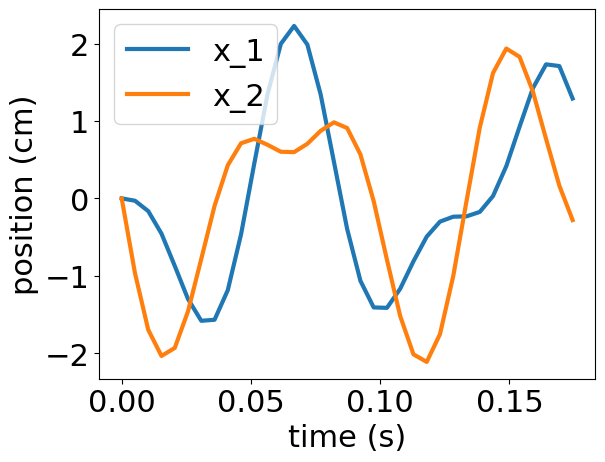

In [8]:
plt.plot(t,state[0,:]*100,label='x_1')
plt.plot(t,state[1,:]*100,label='x_2')
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.legend();

### Discussion

This solution looks very different from a sine function, but what if you set the initial condition to one of the eigenvectors? What do you expect?

In [9]:
T=2*1/w1 # 2 x longest period
dt=1/w2/10 # shortest period
t=np.arange(0,T,dt)
state_e1=np.zeros((4,len(t)))
state_e1[:,0]=np.array([0.02,0.02,0,0]) # set initial conditions eigenv 1
state_e2=np.zeros((4,len(t)))
state_e2[:,0]=np.array([0.02,-0.02,0,0]) # set initial conditions eigenv 2

for i in range(0,len(t)-1):
    state_e1[:,i+1]=heun_step(state_e1[:,i],spring_mass,dt)
    state_e2[:,i+1]=heun_step(state_e2[:,i],spring_mass,dt)

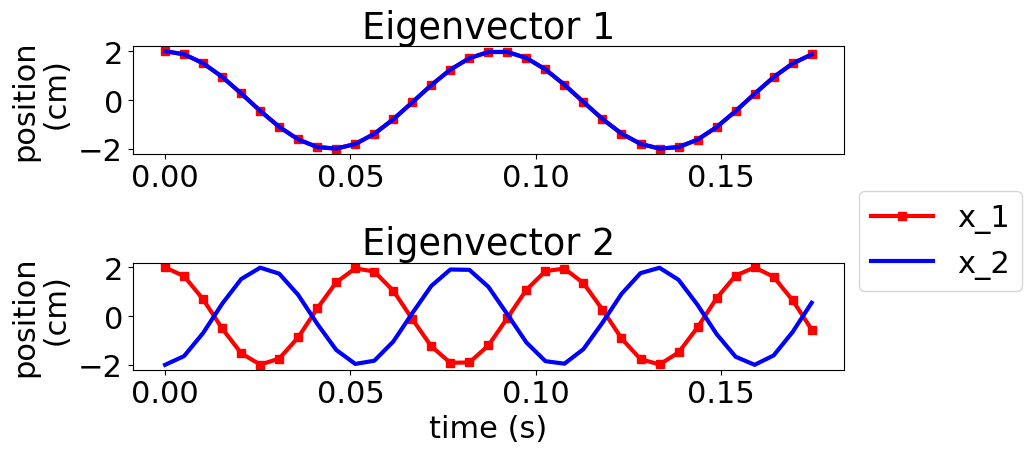

In [10]:
plt.figure(figsize=(9,5))
plt.subplot(2,1,1)
plt.title('Eigenvector 1')
plt.plot(t,state_e1[0,:]*100,'rs-',label='x_1')
plt.plot(t,state_e1[1,:]*100,'b-',label='x_2')
plt.ylabel('position\n (cm)')
plt.subplot(2,1,2)
plt.title('Eigenvector 2')
plt.plot(t,state_e2[0,:]*100,'rs-',label='x_1')
plt.plot(t,state_e2[1,:]*100,'b-',label='x_2')
plt.xlabel('time (s)')
plt.ylabel('position\n (cm)')
plt.tight_layout()
plt.legend(loc='center left',bbox_to_anchor=(1,1.2));

### Exercise

Give the two masses multiples of the eigenvector for the initial velocities. 
e.g. `z[:,0]=np.array([0,0,2,2])` for eigenvector 1. 

How does it change the plots for "Eigenvector 1" and "Eigenvector 2"?

## Back to your Guitar String

So, what do two masses connected to springs have to do with your guitar string? The masses had the following equation of motion (if $m_1=m_2=m$ and $k_1=k_2=k_3$)

$ m \frac{\partial^2}{\partial t^2}
\left[\begin{array}{c}
x_1\\
x_2\end{array}\right] = -k\left[\begin{array}{cc}
2 & -1\\
-1 & 2\end{array}\right] \left[\begin{array}{c}
x_1\\
x_2\end{array}\right].$

Let's create a _course_ finite difference of the guitar string PDE using just 4 points _(2-DOF)_ at $x=0,~1/3,~2/3,~1~m.$ Our goal is to solve for $y_1~and~y_2$, because the points at 0 m and 1 m are fixed to y_0=y_4=0. You create your finite difference equations the same way you did in [02_Keep_it_steady](./02_Keep_it_steady.ipynb). 

$T\frac{\partial^2 y}{\partial x^2} \approx T\frac{y_{i-1}-2y_{i}+y_{i+1}}{h^2} = \mu\frac{\partial^2 y_i}{\partial t^2}$

filling in the boundary conditions and setting up your 2 equations there results

$ \mu \frac{\partial^2}{\partial t^2}
\left[\begin{array}{c}
y_1\\
y_2\end{array}\right] = -\frac{T}{h^2}\left[\begin{array}{cc}
2 & -1\\
-1 & 2\end{array}\right] \left[\begin{array}{c}
y_1\\
y_2\end{array}\right].$

### Discussion

What are the similarities between your 3-element finite difference of a guitar string equation and the 2-mass 3-spring system?

### Predicting your guitar string motion

Using 3 elements is not enough points to predict the shape of the string, but it does illustrate the mathematical analogy between spring-mass systems and travelling waves. Which means you can use the same __eigenvalue__ solution to find natural frequencies and integrate the finite difference differential equations with your `heun_step` function. 

Let's extend your finite difference method to solve for 6 y-values, and a standard A-string guitar [1], L=64 cm, $T=88.3~N$, and $\mu=4.5~g/m,$ 

* $x=0,~^L/_7,~^{2L}/_7,~^{3L}/_7,~^{4L}/_7,~^{5L}/_7,~^{6L}/_7,~L$

* $y_0=y_7=0~m$

$-\frac{T}{h^2\mu}\left[\begin{array}{cccccc}
2 & -1 & 0 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 & 0 \\
0 & 0 & -1 & 2 & -1 & 0 \\
0 & 0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & 0 & -1 & 2 \\
\end{array}\right]
\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
y_{5}\\
y_{6}\end{array}\right]=
\left[\begin{array}{c}
\ddot{y}_1\\
\ddot{y}_2\\
\ddot{y}_3\\
\ddot{y}_4\\
\ddot{y}_5\\
\ddot{y}_6
\end{array}\right]$

$\mathbf{-Ku}\sin\omega t=-\omega^2\mathbf{u}\sin\omega t$

* __eigenvalue problem:__ $\lambda \mathbf{u}=\mathbf{Ku}$

* __our guitar system:__ $\omega^2 \mathbf{u}=\mathbf{Ku}$

* $\omega = \sqrt{\lambda}$ and $f=\frac{\omega}{2\pi}$

In [11]:
L=0.64 # 64-cm guitar string
T=88.29 # 9kg*9.81 m/s/s # N
mu=4.5e-3 # kg/m

In [12]:
N=6 # 6-node guitar string
dx=L/(N+1)

k = T/dx**2/mu

A = k*(np.diag(np.ones(N)*2)\
       -np.diag(np.ones(N-1),-1)\
       -np.diag(np.ones(N-1),1))
print('K=T/mu/h^2*')
print(A/k)

K=T/mu/h^2*
[[ 2. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  2.]]


#### Note: `eig` returns complex, unsorted eigenvalues

The function, [`scipy.linalg.eig`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig), returns unsorted complex, $(a+ib),$ eigenvalues. You can use the real part [`e.real`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.real.html) and put them in ascending order with numpy's [`argsort`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html). 

_The code [`e.real`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.real.html) ignores the imaginary part of the function. Here all of the imaginary components are $\approx 0, $ so you don't lose any information. Try using [`e.imag`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.imag.html) to verify._

In [13]:
e,v=linalg.eig(A)
isort = np.argsort(e.real)
e=e[isort]
v=v[:,isort]

print('Natural frequencies of {}-element string (Hz)'.format(N))
print(e.real**0.5/2/np.pi)
f1=np.sqrt(e.real[0])/2/np.pi
fn=np.sqrt(e.real[-1])/2/np.pi
print('\nLongest time period ={:1.3f} ms\nshortest time period ={:1.3f} ms'.format(1/f1*1000,1/fn*1000))

Natural frequencies of 6-element string (Hz)
[108.51469871 211.58801731 304.05142921 381.26843283 439.3670452
 475.43395929]

Longest time period =9.215 ms
shortest time period =2.103 ms


### Exercise

Plot the first 3 eigenvectors, `v[:,0]`, `v[:,1]`, and `v[:,2]`. The boundary value points have been added below with the function, [`np.pad`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html). 

_Fun fact: guitar string vibration modes take the form $\sin\left(\frac{n\pi x}{L}\right)$ where $n=1...\infty,$ and L is the string length._

In [14]:
ymodes=np.pad(v,((1,1),(0,0))) # add a 0 to the first row and last row, but add nothing to columns 

## Creating your solution for y(x,t)

![Finite difference representation of wave equation](../images/wave_soln.png)

The eigenvalue analysis provides a great deal of insight, but it does not give us your final solution of $y(x,t).$ You can define a new right-hand-side for our state equation using the finite difference description of the guitar string. Here you will use a two-piece state variable where,

* $\mathbf{z}=[\mathbf{z_1,~z_2}]=[\mathbf{y,~\dot{y}}]$
* $\mathbf{\dot{z}}=[\mathbf{\dot{z}_1,~\dot{z}_2}]=[\mathbf{\dot{y},~\ddot{y}}].$

So that your equations can be generally separated into the kinematic,

equations 1-6:

$\mathbf{\dot{z}_1}=\mathbf{z_{2}}$

and the kinetic,

equations 7-14:

$\mathbf{\dot{z}_2}-\frac{T}{h^2\mu}\left[\begin{array}{cccccc}
2 & -1 & 0 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 & 0 \\
0 & 0 & -1 & 2 & -1 & 0 \\
0 & 0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & 0 & -1 & 2 \\
\end{array}\right]
\mathbf{z_1}.$

The last missing piece is that you need an initial state for the system, the initial state inludes the position and velocity of each discrete postion

$\mathbf{z}(0) = [\mathbf{y}(0),~\dot{\mathbf{y}}(0)]$

You'll try two initial states:

1. __Mode 1 vibration:__ $y(x,0) = 0.1\sin(\pi x)$

Text(0.5, 1.0, 'Initial state 1')

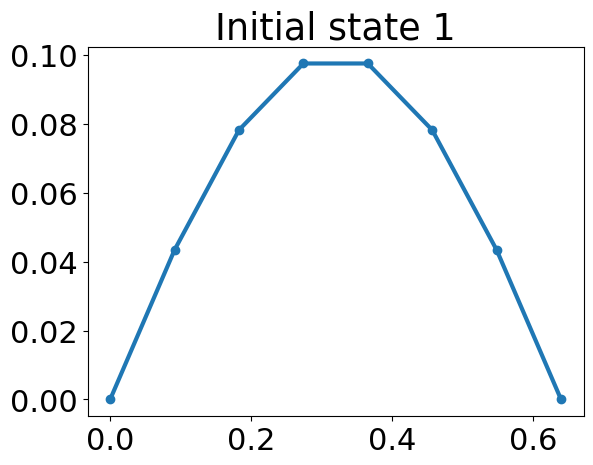

In [15]:
x=np.linspace(0,L,N+2)
y0=0.1*np.sin(np.pi*x/L)
plt.plot(x,y0,'o-')
plt.title('Initial state 1')

2. __Plucking the string:__ $y(x,0) = 0.1x-0.2(x-1)H(x>L/2)$

Text(0.5, 1.0, 'Initial state 2')

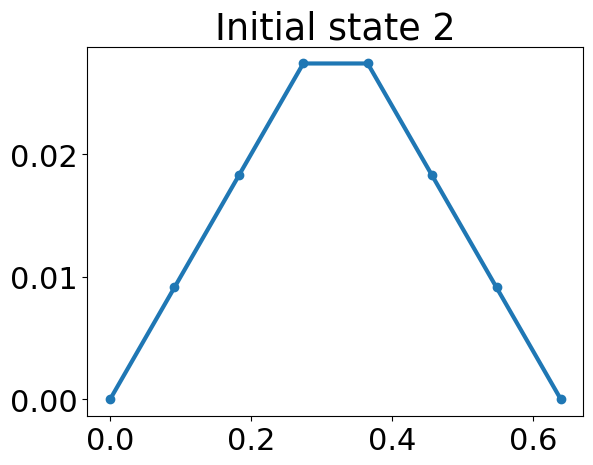

In [16]:
y0=0.1*x -0.2*(x>=L/2)*(x-L/2)
plt.plot(x,y0,'o-')
plt.title('Initial state 2')

In [17]:
def wave_equation(state,T=T,mu=mu,dx=dx):
    '''General Finite Difference Wave Equation
    in a guitar string
    of the form T/mu*d^2y/dx^2=d^2y/dt^2
    Argumemts:
    ----------
    state: state of string [position,velocity]
    T: tension in string
    mu: string density in kg/m
    dx: central difference step size()
    Returns:
    ----------
    dstate: derivative of the state= [velocity,acceleration]
    '''
    k = T/dx**2/mu

    A = k*(np.diag(np.ones(N)*2)\
       -np.diag(np.ones(N-1),-1)\
       -np.diag(np.ones(N-1),1))
    N_s=len(state)
    dstate=np.zeros(len(state))
    dstate[0:int(N_s/2)]=state[int(N_s/2):]
    dstate[int(N_s/2):]=-A@state[0:int(N_s/2)]
    return dstate

### Integrate over time

You can integrate in the same way you did above for the 2DOF harmonic motion and the differential equations from [CompMech03-IVPs](https://github.uconn.edu/rcc02007/CompMech03-IVPs). 

In order to capture enough points to see the motion of the string, you will use two time periods of the smallest frequency

$T_1 = 1/f_1,$ total time $=2T_1$

and use a time step that produces 10 timesteps per shortest time period

$T_6 = 1/f_6,$ $\Delta t=h=\frac{T_6}{10}.$

### Discussion

Why are you using the Heun, implicit method? Would you use a different method?

### 1. Solution 1: $y(x,0) = 0.1\sin(\pi x/L)$

Our first solution will look at the vibration of the string if it is released from rest in its lowest frequency mode shape. 

You will have a solution for $\mathbf{y}(x_i,t_j)~and~\dot{\mathbf{y}}(x_i,t_j)$, so in your case it is a $6\times88$ array. Each column is the shape of the string and each row is the motion of a single point along the string.

In [18]:
T1 = 2/f1 
dt=1/fn/10
t=np.arange(0,T1,dt)
tsteps=len(t)
x=np.linspace(0,L,N+2)
y=np.zeros((N,tsteps))
y[:,0]=0.01*np.sin(np.pi*x[1:-1]/L)
dy=np.zeros((N,tsteps))
for i in range(0,tsteps-1):
    state = np.block([y[:,i],dy[:,i]]) # set z=[y,dy]
    next_state = heun_step(state,wave_equation,dt) # get next state
    y[:,i+1]=next_state[0:N] # save the postions
    dy[:,i+1]=next_state[N:] # save the velocities
    

Text(0.5, 1.0, 'Plotting rows of y(x,t)\neach line is one point along x-axis')

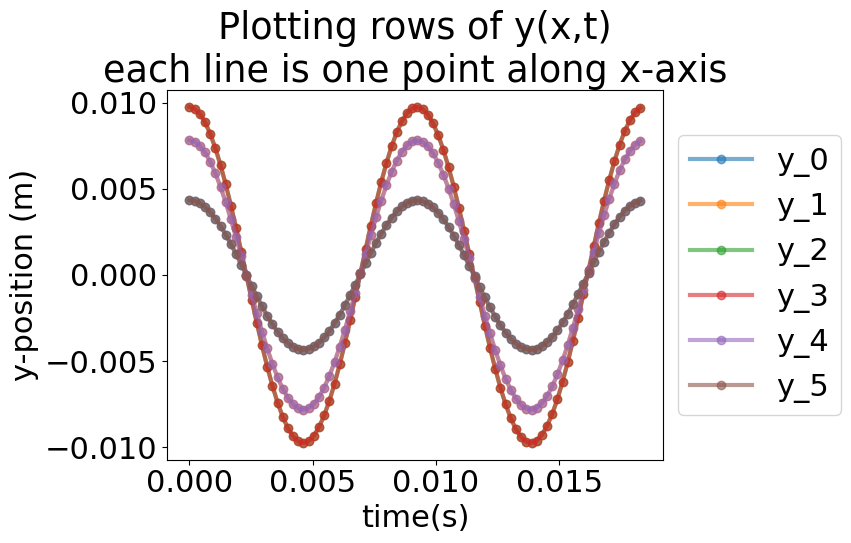

In [19]:
for i in range(0,N):
    plt.plot(t,y[i,:],'o-',label='y_{}'.format(i),alpha=0.6);
plt.legend(bbox_to_anchor=(1,0.5),loc='center left')
plt.xlabel('time(s)')
plt.ylabel('y-position (m)')
plt.title('Plotting rows of y(x,t)\neach line is one point along x-axis')
##plt.plot(np.arange(0,tsteps)*dt,y[50,:]);

Text(0.5, 1.0, 'Plotting columns of y(x,t)\neach line is one point in time')

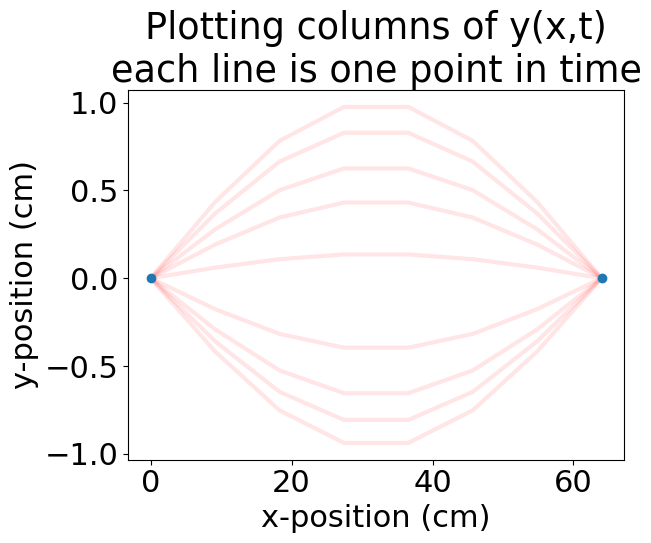

In [20]:
ybcs=np.pad(y,((1,1),(0,0)))
plt.plot(x*100,ybcs[:,0::10]*100,c=(1,0,0,0.1));
plt.plot(x[[0,-1]]*100,[0,0],'o')
plt.xlabel('x-position (cm)')
plt.ylabel('y-position (cm)')
plt.title('Plotting columns of y(x,t)\neach line is one point in time')

#### Fancy 3D plot to see the whole y(x,t) stretched out over the time and space axes

Below is a illustration of the entire array $y(x_i,t_j).$ The x-axis is position, x, the y-axis is the time, t, and the z-axis is the predicted `y[i,j]`.

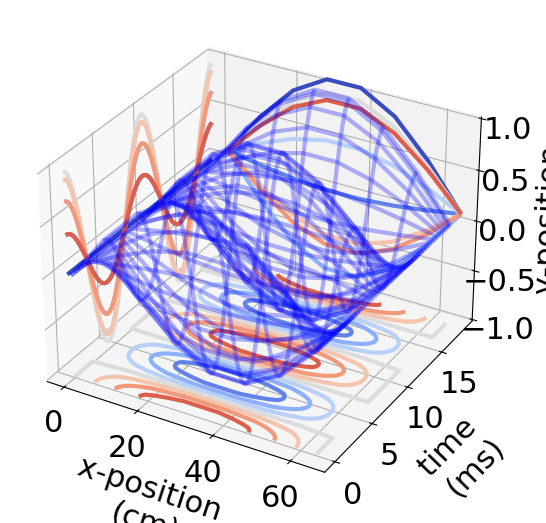

In [21]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111,projection='3d')
TT,XX=np.meshgrid(t,x*100)
ax.plot_wireframe(XX,TT*1000,ybcs*100,color=(0,0,1,0.3))
cset = ax.contour(XX, TT*1000, ybcs*100, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(XX, TT*1000, ybcs*100, zdir='y', offset=20, cmap=cm.coolwarm)
cset = ax.contour(XX, TT*1000, ybcs*100, zdir='x', offset=-1, cmap=cm.coolwarm)
plt.ylabel('\n\ntime \n(ms)')
plt.xlabel('\n\nx-position \n(cm)')
ax.set_zlabel('\n\ny-position \n(cm)')
plt.tight_layout(pad=0.1)
plt.savefig('string.svg')

### 2. Solution 2: $y(x,0) = 0.1x-0.2H(x-L/2)(x-L/2)$

In this second solution, you will increase the spatial resolution of your finite difference method to $h=L/61.$

You will have a solution for $\mathbf{y}(x_i,t_j)~and~\dot{\mathbf{y}}(x_i,t_j)$, so in your case it is a $60\times10T_{60}$ array. As before, each column is the shape of the string and each row is the motion of a single point along the string.

Here, the motion will be a little more interesting, so you will create an animation and a sound recording of the result using

* [matplotlib's animation in HTML5](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/)
* Wav-file writer, [scipy.io.wavfile](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html)

__First, set up the eigenvalue problem and solve for min/max frequencies and time periods.__

In [22]:
L=0.64 # 64-cm guitar string
T=88.29 # 9kg*9.81 m/s/s # N
mu=4.5e-3 # kg/m

In [23]:
N=60 # 60-node guitar string
dx=L/(N+1)

k = T/dx**2/mu

A = k*(np.diag(np.ones(N)*2)\
       -np.diag(np.ones(N-1),-1)\
       -np.diag(np.ones(N-1),1))

In [24]:
e,v=linalg.eig(A)
isort = np.argsort(e.real)
e=e.real[isort]
v=v.real[:,isort]

print('First 10 Natural frequencies of {}-element string (Hz)'.format(N))
print(e.real[:10]**0.5/2/np.pi)
f1=np.sqrt(e.real[0])/2/np.pi
fn=np.sqrt(e.real[-1])/2/np.pi
print('\nLongest time period ={:1.3f} ms\nshortest time period ={:1.3f} ms'.format(1/f1*1000,1/fn*1000))

First 10 Natural frequencies of 60-element string (Hz)
[ 109.41869579  218.76483987  327.96592865  436.94955472  545.64345484
  653.97555789  761.87403267  869.26733545  976.08425752 1082.25397231]

Longest time period =9.139 ms
shortest time period =0.235 ms


### Exercise 

Plot the first 3 vibration modes as you did for the 6-node guitar string. What is different? How would you describe the _convergence_?

### Increase length of simulation

The motion of the string is a little more interesting and complicated in this example. In order to capature the full motion of the string, we'll use 10 periods of the lowest frequency and maintain timesteps of $T_{60}/10,$ the shortest time period vibration mode.

In [25]:
T1 = 10/f1 
dt=1/fn/10
t=np.arange(0,T1,dt)
tsteps=len(t)
x=np.linspace(0,L,N+2)
y=np.zeros((N,tsteps))
y[:,0]=0.1*x[1:-1]-0.2*(x[1:-1]-L/2)*(x[1:-1]>L/2)
dy=np.zeros((N,tsteps))
for i in range(0,tsteps-1):
    state = np.block([y[:,i],dy[:,i]]) # set z=[y,dy]
    next_state = heun_step(state,wave_equation,dt) # get next state
    y[:,i+1]=next_state[0:N] # save the postions
    dy[:,i+1]=next_state[N:] # save the velocities

ybcs = np.pad(y,((1,1),(0,0)))

Text(0.5, 1.0, 'Plotting half the rows of y(x,t)\neach line is one point along x-axis')

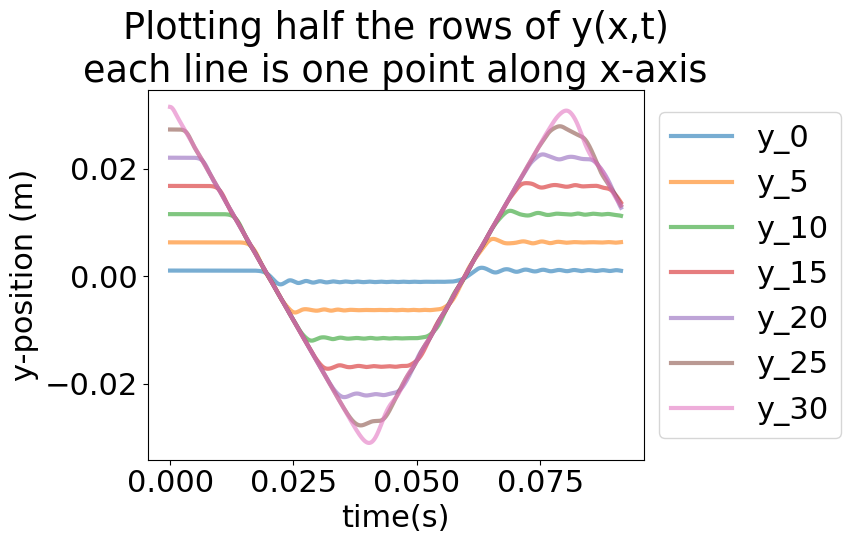

In [26]:
for i in range(0,int(N/2)+1,5):
    plt.plot(t,y[i,:],'-',label='y_{}'.format(i),alpha=0.6);
plt.legend(bbox_to_anchor=(1,0.5),loc='center left')
plt.xlabel('time(s)')
plt.ylabel('y-position (m)')
plt.title('Plotting half the rows of y(x,t)\neach line is one point along x-axis')
##plt.plot(np.arange(0,tsteps)*dt,y[50,:]);

Text(0.5, 1.0, 'Plotting columns of y(x,t)\neach line is one point in time')

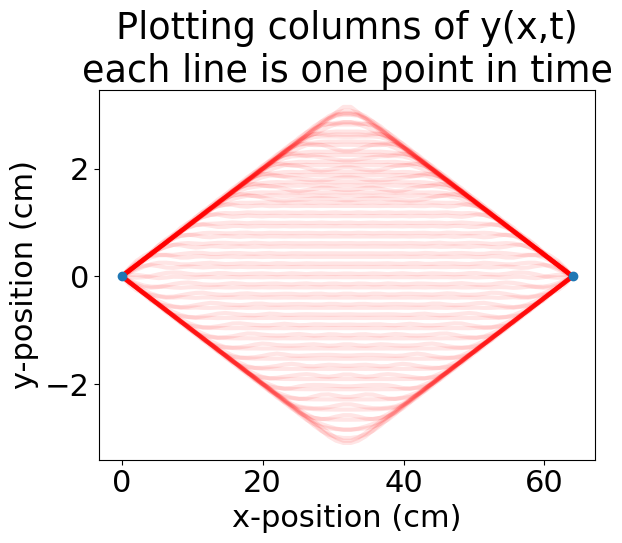

In [27]:
ybcs=np.pad(y,((1,1),(0,0)))
plt.plot(x*100,ybcs[:,0::50]*100,c=(1,0,0,0.1));
plt.plot(x[[0,-1]]*100,[0,0],'o')
plt.xlabel('x-position (cm)')
plt.ylabel('y-position (cm)')
plt.title('Plotting columns of y(x,t)\neach line is one point in time')

### Visualizing the motion

It may be hard to visualize what this motion is really like. Let's create an [animation](https://matplotlib.org/3.2.1/api/animation_api.html) of the string. First, you import two animation libraries:

* [matplotlib's `animation` library](https://matplotlib.org/3.2.1/api/animation_api.html)
* [IPython.display's `HTML` library](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#classes)

Then, you have a few set-up cells to create the animation

1. Create a figure to display the animation and add fixed background

2. Create an initializing (`init`) function that clears the previous line

3. Create an animating (`animate`) function that updates the line

4. Create an animation (`anim`) variable using the `animation.FuncAnimation`

5. Display the animation (`anim`) in an HTML5 output

In [28]:
from matplotlib import animation
from IPython.display import HTML

1. Create a figure to display the animation and add fixed background

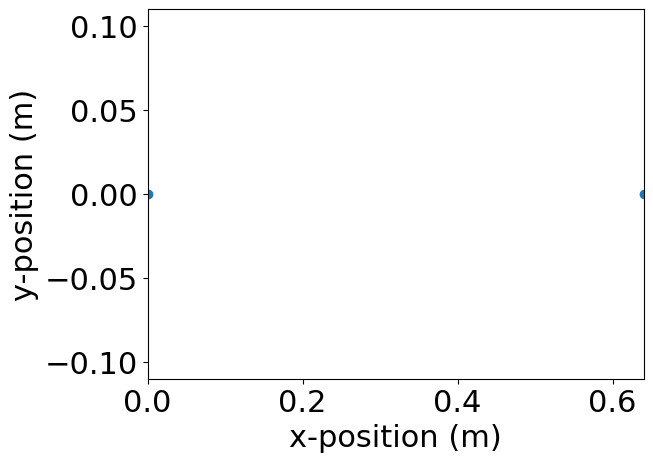

In [29]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((-0.11, 0.11))
ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')
ax.plot(x[[0,-1]],[0,0],'o')

line, = ax.plot([], [], lw=2)

2. Create an initializing (`init`) function that clears the previous line

In [30]:
def init():
    line.set_data([], [])
    return (line,)

3. Create an animating (`animate`) function that updates the line

In [31]:
def animate(i):
    line.set_data(x, ybcs[:,i])
    return (line,)

4. Create an animation (`anim`) variable using the `animation.FuncAnimation`

In [32]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,tsteps,10), interval=10, 
                               blit=True)
print('Animation of String from t=0-{:.1f} ms every {:.2f} ms'.format(t[-1]*1000,t[10]*1000))

Animation of String from t=0-91.4 ms every 0.24 ms


5. Display the animation (`anim`) in an HTML5 output  __Note: this `HTML` function takes a while to run. If you haven't changed the above code, you don't need to run the cell.__

### Animation of String from 
### t=0-91.4 ms frame every 0.24 ms

Below you have the fruits of your toils, you can watch the wave travelling from the center to the boundaries, then reflect back to each other. It's amazing how you can take a simple relation like the wave equation and come up with a realistic slow-motion view of reality. 

__Guitar string equation:__ $\mu\frac{\partial^2 y}{\partial t^2}=T\frac{\partial ^2 y}{\partial x^2}$

In [33]:
anim.save(filename='./guitar_string.gif', 
          writer="pillow", 
                   fps=48)
# HTML(anim.to_html5_video()) 
# use this `HTML` to view inside your Jupyter notebook

![Animation of String from t=0-91.4 ms every 0.24 ms](./guitar_string.gif)

Animation of String from t=0-91.4 ms every 0.24 ms originally stretched
to a triangle shape. 


## Listen to your data

In this application, it would be great if you could record your work and _listen_ to it. Your ears are great at recognizing small changes in pitch (natural frequency). In the Python ecosystem, there is an `Audio` display option. First, you import our display into Jupyter, then you give it an array to listen to. First, let's listen to a pure 110-Hz A note.

In [34]:
from IPython.display import Audio

A-note = $\sin(110~Hz~2\pi \frac{rad}{cycle}t)$

Amplify by 100 for volume.

In [35]:
r=20000
tsig=np.arange(0,1,1/r)
Audio(data=100*np.sin(110*2*np.pi*tsig),rate=r)

### Exercise

Create a 1-second audio clip of the 440-Hz A note.

### Listen to your simulated Guitar

A pick-up on an electric guitar works by magnetizing the steel guitar string and monitoring the magnetic flux produced due to vibrations. This means the sound produced is proportional to the velocity of the string on top of the pick-up [3]. You already calculated the velocity of the guitar strings in your variable `dy`. Now, you can produce the sound by using the velocity near the base of the guitar, `dy[0,:]`.

In [36]:
samplerate = int(1/dt)
out_file=100*np.array([dy[0,:] for i in range(30)]).reshape(-1,)
Audio(data=out_file,rate=samplerate)

Text(0, 0.5, 'input signal (a.u.)')

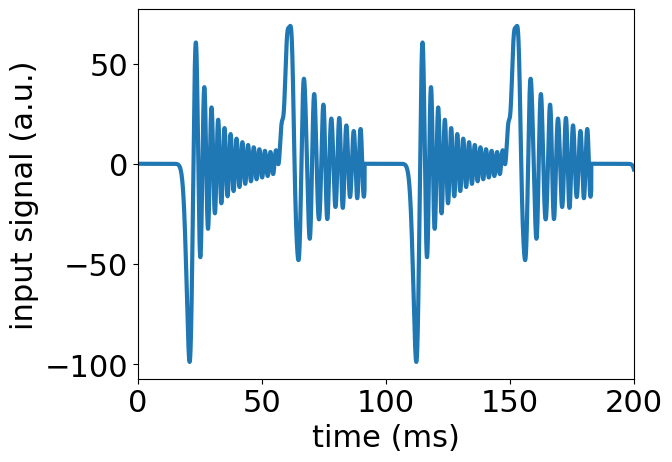

In [37]:
plt.plot(range(0,len(out_file))*dt*1000,out_file)
plt.xlim((0,200))
plt.xlabel('time (ms)')
plt.ylabel('input signal (a.u.)')

### Discussion

Typically guitars will have some filter to get rid of some of the background noise. Would you want to get rid of low frequency (<100 Hz) or high frequency (>1000 Hz) to make your recording better?

## What You've Learned

* How to set up and solve an eigenvalue problem
* How eigenvalues and eigenvectors relate to natural frequencies and mode shapes
* How to turn a _PDE_ into a finite difference _ODE_
* How to use eigenvalues to calculate natural frequencies of a vibrating string
* How to solve a coupled set of _ODEs_ 
* Visualize solutions to finite difference equations with 3D plots and animations
* How to _listen_ to vibration solutions

## References

1. [Noyce Guitars:String Tension](http://www.noyceguitars.com/technotes/articles/t3.html)

2. [Tiao, Louis. Embedding animations in Jupyter](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/)

3. [Lawling, Scott. How Does a Guitar Pickup Really Work?](https://www.guitarworld.com/gear/how-does-a-guitar-pickup-really-work)